# Nota Técnica Eletrônica sobre Estimativa Populacional para Municípios da RMC

Este documento apresenta detalhamento das rotinas computacionais em linguagem Python utilizadas para realização da estimativa da população por município da Região Metropolitana de Curitiba a partir de taxa de crescimento geométrico anual.

Com base nos dados populacionais de 1996, 2000, 2010 e 2022, foram calculadas as taxas geométricas de crescimento intercensitário para, assim, calcular-se a população em cada ano desses intervalos. Optou-se por essa abordagem, pois as estimativas anuais do IBGE, com a principal finalidade de subsidir a distribuição do Fundo de Participação dos Muncípios não são revistas após a publicação dos resultados do Censo subsquente. Por essa razão, acredita-se que a abordagem ora adotada tenha vantagens para dar base ao cálculo ao posterior cálculo de mortalidade por 1.000 habitantes.

## Carregamento e Tratamento de Dados de População - 1996 a 2022

### Dados Originais

Os dados de população foram obtidos da Contagem da População de 1996, bem como dos Censos Demográficos 2000, 2010, 2022, a partir do [Sistema IBGE de Recuperação de Dados - SIDRA](https://sidra.ibge.gov.br/).
No momento da elaboração deste estudo, o Instituto Brasileiro de Geografia e Estatística - IBGE -, havia divulgado apenas o total de população por municípios, sem marcação de sexo ou faixas etárias.

A célula de código abaixo apresenta o carregamento dos dados previamente salvos em arquivo CSV para DataFrame, objeto tabular da biblioteca Pandas, que configura o mais usual método de análise de tabelas em linguagem Python. Os dados DatFrame são, então, expostos.

In [1]:
# importação de biblioteca de manipulação de dados tabulares
import pandas as pd 
import numpy as np

# Carregamento dos dados do arquivo "pop rmc 1996 a 2022 por municipio.csv" para o DataFrame df_pop_1996_2022
df_pop_1996_2022 = pd.read_csv('../source/tab/originais/pop rmc 1996 a 2022 por municipio.csv'
                               ,sep=';'
                               )

# Padronização de nomenclatura de colunas
df_pop_1996_2022.columns = ['Municípios', 1996, 2000, 2010, 2022]

# Estabelecimento da Coluna Municípios como Index
df_pop_1996_2022.set_index(['Municípios'], inplace=True)

#observação preliminar dos dados
df_pop_1996_2022

,1996,2000,2010,2022
Municípios,,,,
Adrianópolis,7339,7518,7106,6256
Agudos do Sul,6443,8803,8057,10233
Almirante Tamandaré,89410,105181,105787,119825
Araucária,76684,117060,115385,151666
Balsa Nova,8745,11799,11424,13395
Bocaiúva do Sul,8583,11273,10638,13281
Campina Grande do Sul,31444,40385,40062,47799
Campo do Tenente,5722,7692,7168,7508
Campo Largo,82972,110679,111226,136327


### Cálculo de Taxa de Crescimento e Estimativa de População em Períodos Intercensitários

A célula adiante faz o tratamento do DataFrame, com cálculo das taxas geométricas e aplicação aos intervalos.


In [2]:
# Criação do DataFrame df_taxa_crecimento_pop
df_taxa_crecimento_pop = pd.DataFrame()

# Cálculo de taxa de crescimento geométrico anual para cada período intercensitário
df_taxa_crecimento_pop['1996 a 2000'] = (df_pop_1996_2022[2000] / df_pop_1996_2022[1996])**(1/(2000-1996)) - 1
df_taxa_crecimento_pop['2000 a 2010'] = (df_pop_1996_2022[2010] / df_pop_1996_2022[2000])**(1/(2010-2000)) - 1
df_taxa_crecimento_pop['2010 a 2022'] = (df_pop_1996_2022[2022] / df_pop_1996_2022[2010])**(1/(2022-2010)) - 1


# Iteração a partir das taxas de crescimento e estimativa da população para cada faixa etária e sexo por ano intercensitário
for taxa in df_taxa_crecimento_pop.columns:
    ano_inicial, ano_final = [int(ano.strip()) for ano in taxa.split('a')]    
    for ano in range(ano_inicial, ano_final):
        #inserção dos dados calculados em novas colunas do DataFrame df_pop_1996_2022
        df_pop_1996_2022[ano] = (df_pop_1996_2022[ano_inicial]*((1+ df_taxa_crecimento_pop[taxa])**(ano-ano_inicial))) #.astype(int)


# reorganização da ordem das colunas, de 1996 a 2022 no DataFrame
df_pop_1996_2022 = df_pop_1996_2022[range(df_pop_1996_2022.columns.min(), df_pop_1996_2022.columns.max()+1)]


df_pop_1996_2022 = df_pop_1996_2022.fillna(0).astype(int)

# salvamento de resultados preliminares
df_pop_1996_2022.to_csv('../source/tab/results/pop_municipios_rmc_1996_2022_estimativa_intercensitaria.csv', sep=';', encoding='utf-8')



#observação preliminar dos dados
df_pop_1996_2022.iloc[np.r_[0:2, -2:0]]

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Municípios,,,,,,,,,,,,,,,,,,,,,
Adrianópolis,7339,7383,7427,7472,7518,7475,7433,7391,7350,7309,...,6883,6810,6738,6667,6597,6527,6458,6390,6322,6256
Agudos do Sul,6443,6965,7531,8142,8803,8725,8648,8572,8496,8421,...,8553,8725,8900,9080,9262,9449,9639,9833,10031,10233
Tijucas do Sul,11559,12391,13284,14241,15268,15134,15001,14870,14739,14610,...,14811,15098,15391,15689,15993,16304,16620,16942,17271,17606
Tunas do Paraná,3426,3909,4461,5091,5810,5743,5677,5612,5548,5484,...,5419,5503,5588,5674,5761,5850,5940,6031,6124,6219


df_pop_1996_2022

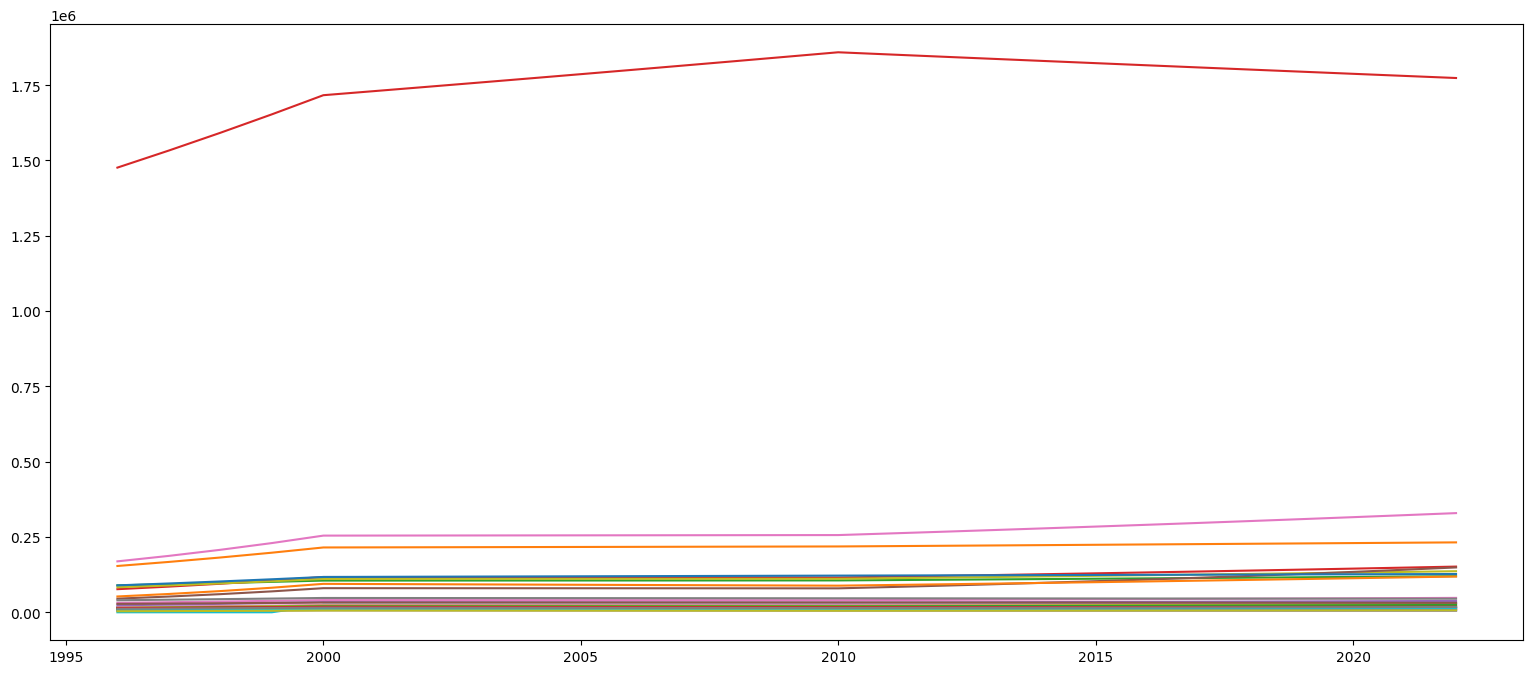

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19, 8)) # additional arguments... 

plt.plot(df_pop_1996_2022.transpose());
